In [9]:
import numpy # библиотека, которая поддерживает многомерные массивы и математические функции
from sklearn import datasets # datasets - модуль, который содержит наборы данных sklearn
import pandas # библиотека для анализа данных
import matplotlib.pyplot as plt # модуль в библиотеке matplotlip, который позволяет создавать графики и визуализировать данные в python 3
from sklearn.model_selection import train_test_split # импортируем из библиотеки  sklearn функцию train_test_split

Рукописный класс, реализующий метод опорных векторов (Support Vector Machine)

In [10]:
class SVM:
  def __init__(self):
    # Конструктор, который используется для инициализации объектов
    # Инициализируем веса и смещение как пустые значения
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    # Извлечение количества образцов и признаков из входных данных X
    # Здесь samples - количество образцов (наблюдений) в тренировочной выборке,
    # _ обозначает пустую переменную
    # shape возвращает размерность масссива (в нашем случае 100*2), для двумерного массива два параметра. Переменная _ не используется, так как нам унжно первое значение
    samples, _ = X.shape
    # Отбираем точки классов
    first_point = X[numpy.where(y==1)[0]][0] # одну первого класса
    second_point = numpy.array([X[numpy.where(y==-1)[0]][0], X[numpy.where(y==-1)[0]][1]]) # две точки второго класса
    # Инициализируем переменные weights и bias
    self.weights = second_point[1] - second_point[0] # рисуем прямую между двумя точками второго класса, определяющую степень наклона гиперплоскости
    self.bias = -numpy.dot(self.weights, first_point) # находим смещение по y
    # weights представляют веса модели, которые будут обновляться
    # bias - это смещение (intercept) модели, также инициализированное нулем

    # Цикл нахождения точного расположения гиперплоскости, до тех пор, пока она не будет точно классифицировать все точки
    while True:
      false_class = 0 # параметр, характеризующий  количество неправильно классифицированных точек относительно гиперплоскости
      # цикл по наблюдениям до тех пор, пока точки не классифицируются верно
      for i in range(samples):
        # Мы проверяем при помощи условия точки, которые классифицированы неверно
        # и добавляем единицу при каждой провальной попытке до того пока не найдем верный вариант
        if y[i] * (numpy.dot(X[i], self.weights) + self.bias) <= 0:
          # Если state равно True, то происходит следующее обновление
          self.weights += y[i] * X[i]
          self.bias += y[i]
          false_class +=1
      if false_class == 0: # если все точки верно классифицированы, то гиперплоскость найдена, поэтому прерываем
        break
  def predict(self, X):
    # Метод, выполняющий предсказания меток классов для новых данных Х на основе обученной модели
    # Вычисление линейной комбинации весов и входных данных.
    #Здесь numpy.dot(X, self.weights) представляет собой скалярное произведение матрицы признаков X и весов модели self.weights.
    #Затем добавляется смещение self.bias. В результате получается значение линейной комбинации.
    predictions = numpy.sign(numpy.dot(X, self.weights) + self.bias) #Функция numpy.sign()
    # возвращает знак числа: 1, если число положительное, -1, если отрицательное, и 0, если число равно нулю.
    # В данном случае, она применяется к результату линейной комбинации.
    return predictions # Метод возвращает предсказанные метки классов для входных данных X
  def paint_function(self, X, y):
    #Функция, которая рисует график. cmap - цвета точек, marker - форма точек
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap = 'coolwarm', marker = 'o', edgecolors = 'black')
    # Генерация 100 равномерно распределенных значений между минимальным и максимальным значениями признака 1
    Ox = numpy.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    # Вычисление значений признака 2 для прямой, определенной параметрами весов и смещения SVM
    Oy = -(self.weights[0] * Ox + self.bias) / self.weights[1]
    plt.plot(Ox, Oy, color = 'black') # Рисуем прямую по параметрам (оси, цвет)
    plt.title('Результат работы SVM для бинарной классификации') # Заголовок графика
    # Подписи осей
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.show() # Отображение

In [11]:
import pandas
import numpy
# Проверка работы класса на датасете с моей фамилией. Датасет зашружаю при помощи файловой системы google colab
my_datasetname = pandas.read_csv("Rubashevskaya.csv") # Читаем датасет
print(my_datasetname.head()) # Просмотр датасета
my_datasetname = my_datasetname.drop(columns = my_datasetname.columns[0]) # Удаляем столбец с нумерацией (unnamed)
# Датасет оформляем как словарь с двумя ключами: data и target
dict_data = {'data': my_datasetname[[my_datasetname.columns[0], my_datasetname.columns[1]]].to_numpy(), # массив из первых двух столбцов(X,Y)
             'target': my_datasetname[my_datasetname.columns[2]].to_numpy(dtype = numpy.int32)} #массив, содержащий третий столбец(метки класса)


   Unnamed: 0         X         Y  метка_класса
0           0  8.649313  8.631379            -1
1           1  8.469598  4.891620            -1
2           2  7.313700  1.455105             1
3           3  8.957509  9.938225            -1
4           4  3.016588  7.537460            -1


-------------------------------------------------------------------------
96.66666666666667 %


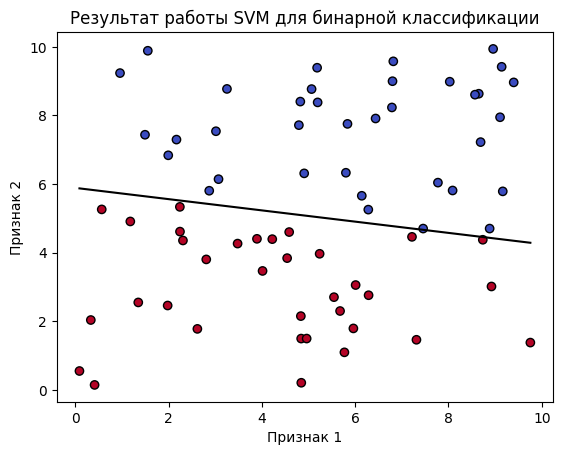

In [17]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(dict_data['data'],dict_data['target'], test_size = 0.3)
# 30% - тестирование (проверка результатов обучения машины); 70% - тренировка (уйдет на обучение машины)
# Создание и обучение модели
svc = SVM() # применяем наш рукописный класс
svc.fit(X_train, Y_train) # обучаем модель
rightness =  ((numpy.sum(svc.predict(X_test) == Y_test)) / Y_test.size) * 100 # считаем точность (уравнение прямой)
# На этом этапе мы имеет от predict'а набор предсказаний теста, которые сравниваются с фактическими значениями
print("-------------------------------------------------------------------------")
print(rightness,'%')
svc.paint_function(X_train, Y_train) #применяем функцию для рисования графика

# ** 2**

In [13]:
from sklearn import svm # встроенный метод опорных векторов
import numpy # библиотека, которая поддерживает многомерные массивы и математические функции
from sklearn import datasets # модуль, который содержит наборы данных Sklearn(мы с ними будем работать)
import pandas #библиотека для анализа данных
from sklearn.model_selection import train_test_split # импортируем из библиотеки sklearn функцию train_test_split

In [14]:
# Чтение датасета с моей фамилией
my_datasetname = pandas.read_csv("Rubashevskaya.csv")
my_datasetname = my_datasetname.drop(columns = my_datasetname.columns[0])
dict_data = {'data': my_datasetname[[my_datasetname.columns[0], my_datasetname.columns[1]]].to_numpy(),
             'target': my_datasetname[my_datasetname.columns[2]].to_numpy(dtype = numpy.int32),
             'DESCR': '\n\nДатасет с моей фамилией'}
# Загрузка датасетов
data_arr = [datasets.load_breast_cancer(), datasets.load_iris(), datasets.load_wine(), datasets.load_digits(), dict_data]
print("Iris plants dataset - Набор данных о растениях ириса\nWine recognition dataset - Набор данных для распознавания вин\nBreast cancer wisconsin (diagnostic) dataset - Набор данных по раку молочной железы в Висконсине (диагностический)\nOptical recognition of handwritten digits dataset - Оптическое распознавание набора данных рукописных цифр\nДатасет с моей фамилией")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
Cores = ["linear","poly","rbf","sigmoid"] # Названия ядер
for dataset in data_arr:                     # Цикл прогона по 5 датасетам
 # data = dataset() # Присвоение переменной data набор данных определенного датасета
  print("------------------------------------------------------------------------")
  print("Датасет: ", dataset['DESCR'].splitlines()[2])
  # атрибут DESCR - это строковая переменная или объект, которая, предположительно, содержит несколько строк текста.
  #.splitlines() - это метод строкового объекта, который разбивает строку на список строк, используя символы новой строки (перевода строки) в качестве разделителя.
  # [2] - это индексация списка, которая выбирает третью строку (от 0, поэтому [2] выберет третий элемент).
  print("------------------------------------------------------------------------")
  best_accuracy = numpy.array([])
  # разделим данные с помощью train_test_split
  # 70% - тренировка (уйдет на обучение машины); 30% - тестирование (проверка результатов обучения машины)
  X_train, X_test, Y_train, Y_test = train_test_split(dataset['data'], dataset['target'], test_size = 0.3)
# Цикл прогона по ядрам
  for core in Cores:
    svc = svm.SVC(kernel = core, C = 1000) # Применение встроенного метода опорных векторов. С - количество итераций для большей точности
    svc.fit(X_train,Y_train)               # Обучение модели
    # считаем точность(уравнение прямой) на основе предсказаний меток
    rightness =  ((numpy.sum(svc.predict(X_test) == Y_test)) / Y_test.size) * 100
    best_accuracy = numpy.append(best_accuracy, rightness) # заносим точности в массив
    print(f"При ядре {core} точность: {rightness: 4f}%") #точность - до 4 знака после запятой
    print(" ")
    print(f"Лучший результат при ядре {Cores[numpy.argmax(best_accuracy)]} - {numpy.max(best_accuracy):.4f}")
   # print("-----------------------------------------------------------------------")

Iris plants dataset - Набор данных о растениях ириса
Wine recognition dataset - Набор данных для распознавания вин
Breast cancer wisconsin (diagnostic) dataset - Набор данных по раку молочной железы в Висконсине (диагностический)
Optical recognition of handwritten digits dataset - Оптическое распознавание набора данных рукописных цифр
Датасет с моей фамилией
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
------------------------------------------------------------------------
Датасет:  Breast cancer wisconsin (diagnostic) dataset
------------------------------------------------------------------------
При ядре linear точность:  97.076023%
 
Лучший результат при ядре linear - 97.0760
При ядре poly точность:  91.228070%
 
Лучший результат при ядре linear - 97.0760
При ядре rbf точность:  93.567251%
 
Лучший результат при ядре linear - 97.0760
При ядре sigmoid точность:  38.596491%
 
Лучший результат при ядре linear - 97.0760
------------------------------------

# **3**

In [15]:
from sklearn.linear_model import LogisticRegression
import numpy # библиотека, которая поддерживает многомерные массивы и математические функции
from sklearn import datasets # модуль, который содержит наборы данных Sklearn(мы с ними будем работать)
import pandas #библиотека для анализа данных
from sklearn.model_selection import train_test_split # импортируем из библиотеки  sklearn функцию train_test_split

In [16]:
# Чтение датасета с моей фамилией
my_datasetname = pandas.read_csv("Rubashevskaya.csv")
my_datasetname = my_datasetname.drop(columns = my_datasetname.columns[0])
dict_data = {'data': my_datasetname[[my_datasetname.columns[0], my_datasetname.columns[1]]].to_numpy(),
             'target': my_datasetname[my_datasetname.columns[2]].to_numpy(dtype = numpy.int32),
             'DESCR': '\n\nДатасет с моей фамилией'}
# Загрузка датасетов
data_arr = [datasets.load_breast_cancer(), datasets.load_iris(), datasets.load_wine(), datasets.load_digits(), dict_data]
print("Iris plants dataset - Набор данных о растениях ириса\nWine recognition dataset - Набор данных для распознавания вин\nBreast cancer wisconsin (diagnostic) dataset - Набор данных по раку молочной железы в Висконсине (диагностический)\nOptical recognition of handwritten digits dataset - Оптическое распознавание набора данных рукописных цифр\nДатасет с моей фамилией")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
Solvers = ["lbfgs","liblinear","newton-cg","newton-cholesky","sag","saga"] # Названия solver'ов
for dataset in data_arr:                     # Цикл прогона по 4 датасетам
 # data = dataset() # Присвоение переменной data набор данных определенного датасета
  print("------------------------------------------------------------------------")
  print("Датасет: ", dataset['DESCR'].splitlines()[2])
  # атрибут DESCR - это строковая переменная или объект, которая, предположительно, содержит несколько строк текста.
  #.splitlines() - это метод строкового объекта, который разбивает строку на список строк, используя символы новой строки (перевода строки) в качестве разделителя.
  # [2] - это индексация списка, которая выбирает третью строку (от 0, поэтому [2] выберет третий элемент).
  print("------------------------------------------------------------------------")
  best_accuracy = numpy.array([])
  # разделим данные с помощью train_test_split
  # train - тренировка, test - проверка; 70% - тренировка (уйдет на обучение машины), оставшиеся 30% - тестирование (проверка результатов обучения машины)
  X_train, X_test, Y_train, Y_test = train_test_split(dataset['data'], dataset['target'], train_size = 0.7)

  for solve in Solvers:
    svc = LogisticRegression(max_iter = 20000, solver = solve, C = 1000)
    svc.fit(X_train,Y_train) # Обучение модели по тренировочным значениям
    rightness =  ((numpy.sum(svc.predict(X_test) == Y_test)) / Y_test.size) * 100 #считаем точность
    best_accuracy = numpy.append(best_accuracy, rightness)
    print(f"При  {solve} точность: {rightness: 4f}%")
    print(" ")
    print(f"Лучший результат при {Solvers[numpy.argmax(best_accuracy)]} - {numpy.max(best_accuracy):.4f}")

Iris plants dataset - Набор данных о растениях ириса
Wine recognition dataset - Набор данных для распознавания вин
Breast cancer wisconsin (diagnostic) dataset - Набор данных по раку молочной железы в Висконсине (диагностический)
Optical recognition of handwritten digits dataset - Оптическое распознавание набора данных рукописных цифр
Датасет с моей фамилией
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
------------------------------------------------------------------------
Датасет:  Breast cancer wisconsin (diagnostic) dataset
------------------------------------------------------------------------
При  lbfgs точность:  95.321637%
 
Лучший результат при lbfgs - 95.3216
При  liblinear точность:  95.906433%
 
Лучший результат при liblinear - 95.9064
При  newton-cg точность:  95.321637%
 
Лучший результат при liblinear - 95.9064
При  newton-cholesky точность:  95.321637%
 
Лучший результат при liblinear - 95.9064
При  sag точность:  93.567251%
 
Лучший резуль

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #14. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Matrix is singular.
  warnings.warn(


При  sag точность:  96.111111%
 
Лучший результат при lbfgs - 96.1111
При  saga точность:  95.925926%
 
Лучший результат при lbfgs - 96.1111
------------------------------------------------------------------------
Датасет:  Датасет с моей фамилией
------------------------------------------------------------------------
При  lbfgs точность:  96.666667%
 
Лучший результат при lbfgs - 96.6667
При  liblinear точность:  96.666667%
 
Лучший результат при lbfgs - 96.6667
При  newton-cg точность:  96.666667%
 
Лучший результат при lbfgs - 96.6667
При  newton-cholesky точность:  96.666667%
 
Лучший результат при lbfgs - 96.6667
При  sag точность:  96.666667%
 
Лучший результат при lbfgs - 96.6667
При  saga точность:  96.666667%
 
Лучший результат при lbfgs - 96.6667
